**VGG19 Model**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = "/content/drive/MyDrive/Plant"
batch_size = 32
num_epochs = 10
image_size = (224, 224)

In [ ]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load Pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False)

In [ ]:
# Customize the Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Create Data Generator
data_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 2162 images belonging to 3 classes.


In [ ]:
#Split data into training, validation, and test sets
X, y = [], []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, file)
            X.append(img_path)
            y.append(subdir)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Training the Model
history = model.fit(
    data_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=num_epochs,
    validation_data=data_generator,
    validation_steps=len(X_val) // batch_size
)

Epoch 1/10
43/43 [==============================] - 238s 5s/step - loss: 0.3490 - accuracy: 0.7703 - val_loss: 0.4597 - val_accuracy: 0.6594
Epoch 2/10
43/43 [==============================] - 105s 2s/step - loss: 0.2036 - accuracy: 0.8811 - val_loss: 0.1580 - val_accuracy: 0.9281
Epoch 3/10
43/43 [==============================] - 45s 1s/step - loss: 0.1771 - accuracy: 0.8928 - val_loss: 0.1168 - val_accuracy: 0.9344
Epoch 4/10
43/43 [==============================] - 40s 945ms/step - loss: 0.1246 - accuracy: 0.9288 - val_loss: 0.0615 - val_accuracy: 0.9625
Epoch 5/10
43/43 [==============================] - 34s 799ms/step - loss: 0.0800 - accuracy: 0.9513 - val_loss: 0.0569 - val_accuracy: 0.9625
Epoch 6/10
43/43 [==============================] - 38s 873ms/step - loss: 0.0548 - accuracy: 0.9677 - val_loss: 0.1270 - val_accuracy: 0.9406
Epoch 7/10
43/43 [==============================] - 38s 872ms/step - loss: 0.0715 - accuracy: 0.9633 - val_loss: 0.0195 - val_accuracy: 0.9937
Epoch 

In [ ]:
# Evaluate the Model
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=len(X_test) // batch_size)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 2162 images belonging to 3 classes.


<ipython-input-17-a1edd93a68a9>:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=len(X_test) // batch_size)


Test Loss: 0.0002
Test Accuracy: 100.00%


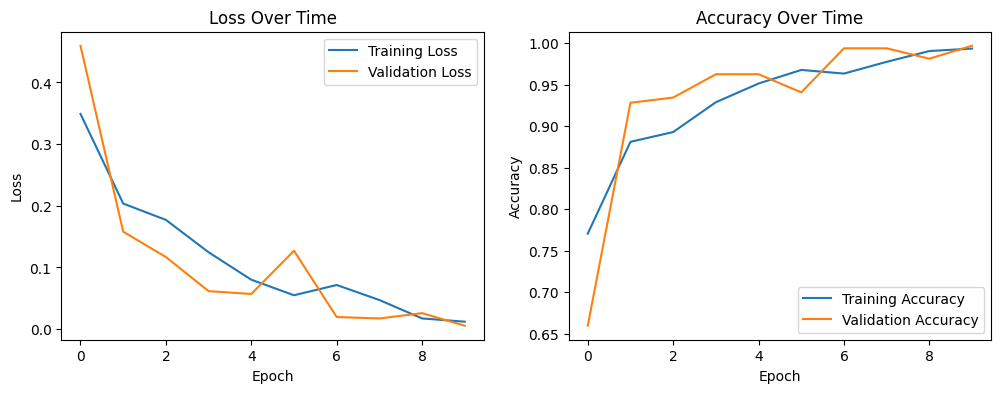

In [ ]:
# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/vgg19.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**InceptionV3 Model**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [ ]:
data_dir = '/content/drive/MyDrive/Plant'
batch_size = 32
num_epochs = 20
image_size = (224, 224)

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load Pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

In [ ]:
# Customize the Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Create Data Generator
data_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2162 images belonging to 3 classes.


In [ ]:
# Split data into training, validation, and test sets
X, y = [], []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, file)
            X.append(img_path)
            y.append(subdir)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Training the Model
history = model.fit(
    data_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=num_epochs,
    validation_data=data_generator,
    validation_steps=len(X_val) // batch_size
)

Epoch 1/20
43/43 [==============================] - 92s 1s/step - loss: 0.2711 - accuracy: 0.8950 - val_loss: 0.3944 - val_accuracy: 0.8687
Epoch 2/20
43/43 [==============================] - 36s 852ms/step - loss: 0.0887 - accuracy: 0.9658 - val_loss: 0.0480 - val_accuracy: 0.9750
Epoch 3/20
43/43 [==============================] - 30s 707ms/step - loss: 0.0670 - accuracy: 0.9809 - val_loss: 0.0291 - val_accuracy: 0.9906
Epoch 4/20
43/43 [==============================] - 37s 859ms/step - loss: 0.0482 - accuracy: 0.9860 - val_loss: 0.0303 - val_accuracy: 0.9969
Epoch 5/20
43/43 [==============================] - 30s 703ms/step - loss: 0.0446 - accuracy: 0.9853 - val_loss: 0.0226 - val_accuracy: 0.9906
Epoch 6/20
43/43 [==============================] - 30s 688ms/step - loss: 0.0160 - accuracy: 0.9956 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 7/20
43/43 [==============================] - 30s 693ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0042 - val_accuracy: 0.9969
Ep

In [ ]:
model.save('/content/drive/MyDrive/InceptionV3.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


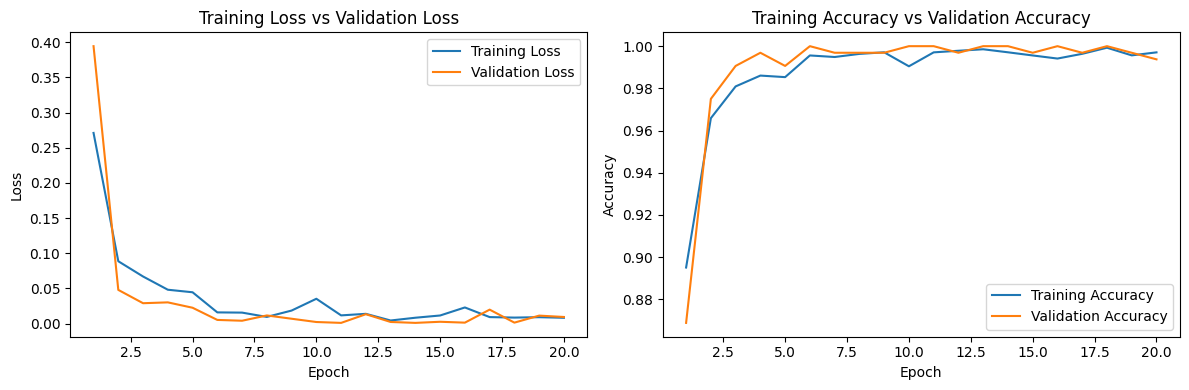

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Xception Model**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [ ]:
# Define your data directory and parameters
data_dir = '/content/drive/MyDrive/Plant'
batch_size = 32
num_epochs = 20
image_size = (224, 224)

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load Pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False)

# Customize the Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create Data Generator
data_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Split data into training, validation, and test sets
X, y = [], []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, file)
            X.append(img_path)
            y.append(subdir)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

83683744/83683744 [==============================] - 5s 0us/step
Found 2162 images belonging to 3 classes.


In [ ]:
# Training the Model
history = model.fit(
    data_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=num_epochs,
    validation_data=data_generator,
    validation_steps=len(X_val) // batch_size
)

# Save the trained model
model.save('/content/drive/MyDrive/xception_model.h5')

Epoch 1/20
43/43 [==============================] - 73s 909ms/step - loss: 0.3610 - accuracy: 0.8781 - val_loss: 0.1568 - val_accuracy: 0.9187
Epoch 2/20
43/43 [==============================] - 35s 804ms/step - loss: 0.0791 - accuracy: 0.9780 - val_loss: 0.1942 - val_accuracy: 0.9219
Epoch 3/20
43/43 [==============================] - 39s 897ms/step - loss: 0.0417 - accuracy: 0.9831 - val_loss: 0.0603 - val_accuracy: 0.9750
Epoch 4/20
43/43 [==============================] - 40s 919ms/step - loss: 0.0317 - accuracy: 0.9890 - val_loss: 0.0112 - val_accuracy: 0.9969
Epoch 5/20
43/43 [==============================] - 39s 905ms/step - loss: 0.0209 - accuracy: 0.9927 - val_loss: 0.0308 - val_accuracy: 0.9844
Epoch 6/20
43/43 [==============================] - 40s 921ms/step - loss: 0.0219 - accuracy: 0.9949 - val_loss: 0.0125 - val_accuracy: 0.9969
Epoch 7/20
43/43 [==============================] - 39s 895ms/step - loss: 0.0119 - accuracy: 0.9934 - val_loss: 0.0015 - val_accuracy: 1.0000

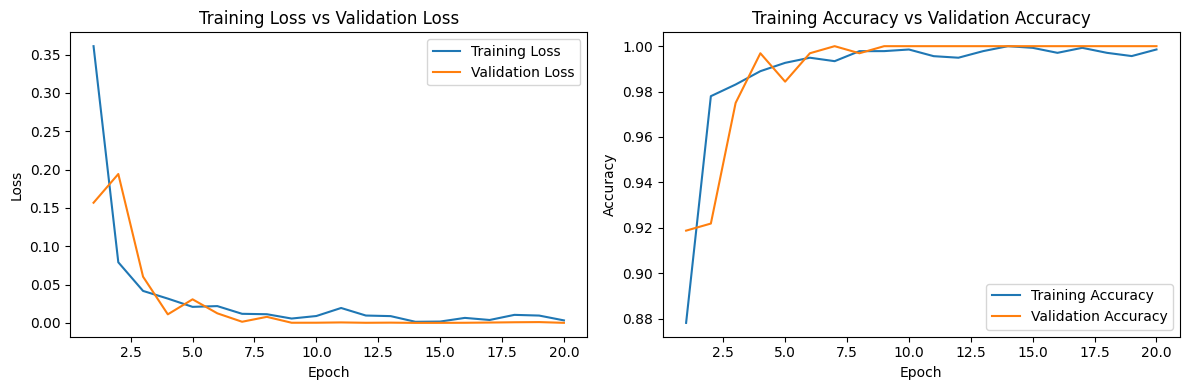

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**VGG16 Model**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = "/content/drive/MyDrive/Plant"
batch_size = 32
num_epochs = 10
image_size = (224, 224)

In [ ]:
#Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load Pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Customize the Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Create Data Generator
data_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True)

Found 2162 images belonging to 3 classes.


In [ ]:
#Split data into training, validation, and test sets
X, y = [], []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, file)
            X.append(img_path)
            y.append(subdir)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Training the Model
history = model.fit(
    data_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=num_epochs,
    validation_data=data_generator,
    validation_steps=len(X_val) // batch_size
)

Epoch 1/10
43/43 [==============================] - 34s 779ms/step - loss: 0.0163 - accuracy: 0.9897 - val_loss: 0.0163 - val_accuracy: 0.9906
Epoch 2/10
43/43 [==============================] - 38s 883ms/step - loss: 0.0204 - accuracy: 0.9875 - val_loss: 0.0241 - val_accuracy: 0.9875
Epoch 3/10
43/43 [==============================] - 38s 894ms/step - loss: 0.0498 - accuracy: 0.9746 - val_loss: 0.0229 - val_accuracy: 0.9875
Epoch 4/10
43/43 [==============================] - 36s 833ms/step - loss: 0.0144 - accuracy: 0.9913 - val_loss: 0.0090 - val_accuracy: 0.9937
Epoch 5/10
43/43 [==============================] - 36s 835ms/step - loss: 0.0142 - accuracy: 0.9912 - val_loss: 0.0045 - val_accuracy: 0.9969
Epoch 6/10
43/43 [==============================] - 40s 913ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 7/10
43/43 [==============================] - 37s 865ms/step - loss: 0.0078 - accuracy: 0.9963 - val_loss: 0.0092 - val_accuracy: 0.9906

In [ ]:
# Evaluate the Model
test_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=len(X_test) // batch_size)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Found 2162 images belonging to 3 classes.


<ipython-input-11-a1edd93a68a9>:10: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(test_generator, steps=len(X_test) // batch_size)


Test Loss: 0.0076
Test Accuracy: 99.52%


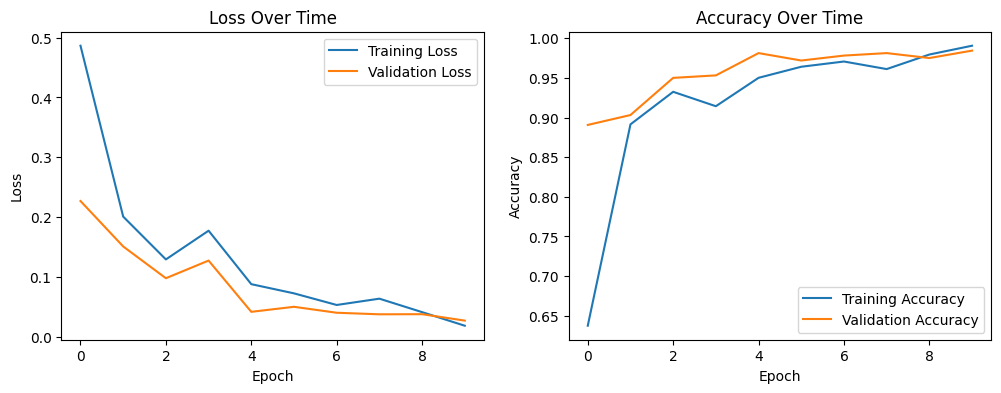

In [ ]:
# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')

plt.show()

In [ ]:
model.save('/content/drive/MyDrive/vgg16.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**ResNet50V2 Model**

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

In [ ]:
# Define your data directory and parameters
data_dir = '/content/drive/MyDrive/Plant'
batch_size = 32
num_epochs = 20
image_size = (224, 224)

In [ ]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Load Pre-trained ResNet50V2 model
base_model = ResNet50V2(weights='imagenet', include_top=False)

94668760/94668760 [==============================] - 6s 0us/step


In [ ]:
# Customize the Model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the Model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Create Data Generator
data_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 2162 images belonging to 3 classes.


In [ ]:
# Split data into training, validation, and test sets
X, y = [], []

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            img_path = os.path.join(subdir_path, file)
            X.append(img_path)
            y.append(subdir)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Training the Model
history = model.fit(
    data_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=num_epochs,
    validation_data=data_generator,
    validation_steps=len(X_val) // batch_size
)

Epoch 1/20
43/43 [==============================] - 81s 906ms/step - loss: 0.2810 - accuracy: 0.8965 - val_loss: 0.0553 - val_accuracy: 0.9781
Epoch 2/20
43/43 [==============================] - 38s 887ms/step - loss: 0.0577 - accuracy: 0.9802 - val_loss: 0.2492 - val_accuracy: 0.9375
Epoch 3/20
43/43 [==============================] - 40s 915ms/step - loss: 0.0603 - accuracy: 0.9824 - val_loss: 0.1010 - val_accuracy: 0.9656
Epoch 4/20
43/43 [==============================] - 31s 727ms/step - loss: 0.0228 - accuracy: 0.9906 - val_loss: 0.0385 - val_accuracy: 0.9875
Epoch 5/20
43/43 [==============================] - 39s 912ms/step - loss: 0.0471 - accuracy: 0.9831 - val_loss: 0.1033 - val_accuracy: 0.9625
Epoch 6/20
43/43 [==============================] - 41s 948ms/step - loss: 0.0244 - accuracy: 0.9913 - val_loss: 0.0420 - val_accuracy: 0.9844
Epoch 7/20
43/43 [==============================] - 36s 840ms/step - loss: 0.0232 - accuracy: 0.9920 - val_loss: 0.0029 - val_accuracy: 1.0000

In [ ]:
model.save('/content/drive/MyDrive/ResNet50V2.h5')

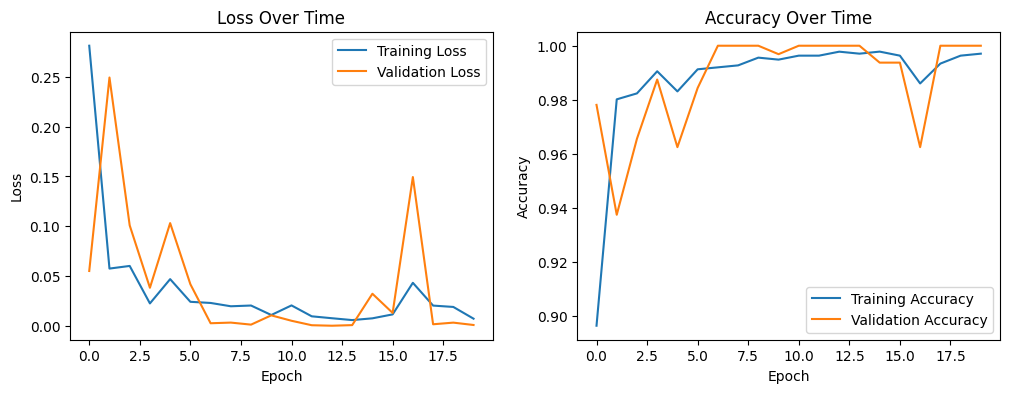

In [ ]:
# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Time')

plt.show()